# Duplicate usage analysis

In [1]:
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## data description

df2 usage_cpu_e3_t25_main.csv: CPU only transforms

df3 usage_e3_t25_gpu_transforms.csv: GPU transforms but with transfer to the CPU

df4 data/usage_cpu_torch_empty_cuda_e3_t25.csv: Experiment with CPU only transform but resetting the CUDA cache on every iteration -> Learn how deep the memory sinks in between iterations

df5 data/usage_GPU_transforms_e5_little_cpu_transfer.csv

df6 All transforms are done on the GPU and no transfer on the CPU is done..

Further descriptions are on notion!

Missing:
3) Debug batch data and see where else data might be on the GPU..


What did not work:

- deletion of all non relevant entries in the batch data - apparently they are not the problem..
- 

In [3]:
# location = 'data/2_usage.csv' #df1
# location = 'data/usage_cpu_e3_t25_main.csv' #df2
# location = 'data/usage_e3_t25_gpu_transforms.csv' #df3
# location = 'data/usage_cpu_torch_empty_cuda_e3_t25.csv' #df4
# location = 'data/usage_GPU_transforms_e5_little_cpu_transfer.csv' #df5
# location = 'data/usage_all_on_gpu_e_3.csv' #df6
location = '../../data/31_usage.csv'
location2 = '../../data/59_usage.csv'
# location = 'data/17_usage.csv'
df = pd.read_csv(location) 
df2 = pd.read_csv(location2)

In [6]:
print(df.describe())
print(df2.describe())

        device  context  gpu util (%)  memory util (%)  total memory (MB)  \
count  76619.0      0.0  76619.000000     76619.000000            76619.0   
mean       1.0      NaN      0.638739         0.310948            49140.0   
std        0.0      NaN      0.288382         0.155747                0.0   
min        1.0      NaN      0.000000         0.000000            49140.0   
25%        1.0      NaN      0.420000         0.180000            49140.0   
50%        1.0      NaN      0.570000         0.270000            49140.0   
75%        1.0      NaN      1.000000         0.490000            49140.0   
max        1.0      NaN      1.000000         0.550000            49140.0   

       free memory (MB)  used memory (MB)  memory reserved by torch (MB)  \
count      76619.000000      76619.000000                   76619.000000   
mean       29443.709184      19696.290816                   10893.433639   
std         7755.375100       7755.375100                    6989.897786   
mi

In [7]:
df["time"] = pd.to_datetime(df["time"])
df2["time"] = pd.to_datetime(df2["time"])

In [9]:
# util = df.loc[:,"utilization"].rolling(5).sum()  / 5
# util.plot(subplots=True, figsize=(15,2),ylim=(0,100))

In [6]:
# df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'].plot(
#     subplots=True, 
#     figsize=(15,10), 
#     ylim=(0,df.loc[:,"total memory (MB)"][0]))


In [7]:
# pd.DataFrame.plot(df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'], subplots=True, 
#                 figsize=(15,10), 
#                 ylim=(0,df.loc[:,"total memory (MB)"][0]))

In [10]:
df["used memory moving average"] = df.loc[:,"used memory (MB)"].rolling(200).sum()  / 200

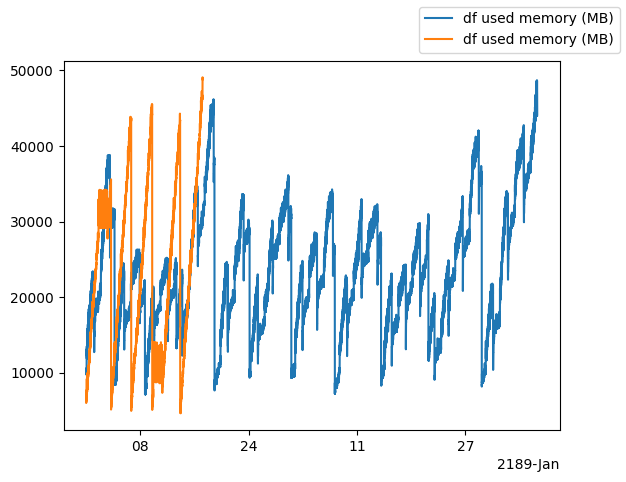

In [15]:
plot, ax = plt.subplots()
from_tick = 35000
to_tick = max(df.shape[0], df2.shape[0])
for i in ("used memory (MB)",):
    ax.plot(df.loc[from_tick:to_tick, i], label=f"df {i}")
    ax.plot(df2.loc[from_tick:to_tick, i], label=f"df {i}")
    # ax.plot(df.loc[from_tick:to_tick, 'time'], df.loc[from_tick:to_tick, i], label=f"df {i}")
    # ax.plot(df2.loc[from_tick:to_tick, 'time'], df2.loc[from_tick:to_tick, i], label=f"df2 {i}")
    
plot.legend()

cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

In [14]:
df.columns
df.shape[0]
# df.loc[18000:, 'time']
# df.loc[:," total memory (MB)"][0]
# df.loc[:," Memory not used by torch (MB)"][10]

51504